In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
counting = np.load("../data/output/LSMS/malawi/counting.npy")
counting = counting

print(np.max(counting))

414


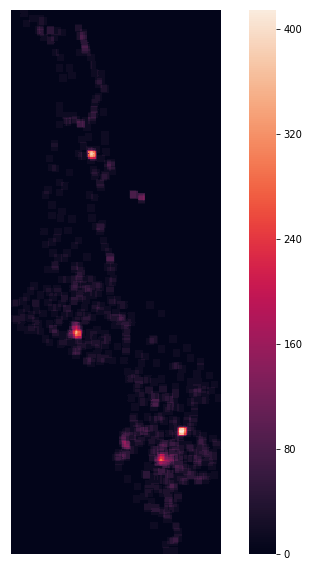

In [40]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
sns.heatmap(pooling(counting, (2,2)), ax=ax, yticklabels=False, xticklabels=False, linewidth=0)
plt.show()

In [5]:
def pooling(mat,ksize,method='max',pad=False):
    '''Non-overlapping pooling on 2D or 3D data.

    <mat>: ndarray, input array to pool.
    <ksize>: tuple of 2, kernel size in (ky, kx).
    <method>: str, 'max for max-pooling, 
                   'mean' for mean-pooling.
    <pad>: bool, pad <mat> or not. If no pad, output has size
           n//f, n being <mat> size, f being kernel size.
           if pad, output has size ceil(n/f).

    Return <result>: pooled matrix.
    '''

    m, n = mat.shape[:2]
    ky,kx=ksize

    _ceil=lambda x,y: int(numpy.ceil(x/float(y)))

    if pad:
        ny=_ceil(m,ky)
        nx=_ceil(n,kx)
        size=(ny*ky, nx*kx)+mat.shape[2:]
        mat_pad=np.full(size,numpy.nan)
        mat_pad[:m,:n,...]=mat
    else:
        ny=m//ky
        nx=n//kx
        mat_pad=mat[:ny*ky, :nx*kx, ...]

    new_shape=(ny,ky,nx,kx)+mat.shape[2:]

    if method=='max':
        result=np.nanmax(mat_pad.reshape(new_shape),axis=(1,3))
    else:
        result=np.nanmean(mat_pad.reshape(new_shape),axis=(1,3))

    return result

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


15247
10233
323
6296


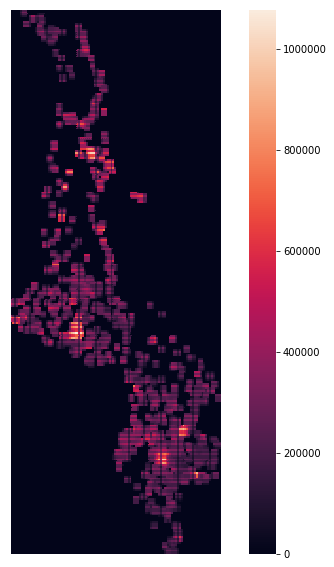

In [43]:
med_expenses = np.load("../data/output/LSMS/malawi/med_expenses.npy")
print(len(med_expenses[med_expenses > 504200]))
print(len(med_expenses[med_expenses < 504200])-len(med_expenses[med_expenses == 0]))
pooled = pooling(med_expenses,(3,3), method='mean')
print(len(pooled[pooled > 504200]))
print(len(pooled[pooled < 504200])-len(pooled[pooled == 0]))

fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
sns.heatmap(pooled, ax=ax, yticklabels=False, xticklabels=False, linewidth=0)
plt.show()